<a href="https://colab.research.google.com/github/shivaanginidoctor/shivaangini-/blob/main/linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import gdown
import pandas as pd

file_id = '1DdyFZ9fizNFyinCvnW3npY7S43bkzD63'
output_file = 'Train.csv'  # Name for the downloaded file

# URL for the file
download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, output_file, quiet=False)
train = pd.read_csv(output_file, sep=',')  # Or sep=';' if semicolon separated
train = pd.read_csv(output_file, sep=',')  # Or sep=';' if semicolon separated

Downloading...
From: https://drive.google.com/uc?id=1DdyFZ9fizNFyinCvnW3npY7S43bkzD63
To: /content/Train.csv
100%|██████████| 404k/404k [00:00<00:00, 71.0MB/s]


In [ ]:
file_id = '1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L'
output_file = 'Test.csv'  # Name for the downloaded file

# URL for the file
download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, output_file, quiet=False)
test = pd.read_csv(output_file, sep=',')  # Or sep=';' if semicolon separated
test = pd.read_csv(output_file, sep=',')  # Or sep=';' if semicolon separated

Downloading...
From: https://drive.google.com/uc?id=1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L
To: /content/Test.csv
100%|██████████| 134k/134k [00:00<00:00, 76.3MB/s]


In [ ]:
def extract(value):
    try:
        return float(value.split()[0]) #use float and not int, int shows error, expects whole values. Also will show value error when string conversion takes place.
    except:
        return np.nan

In [ ]:
# Display basic information about the dataset
print(train.info())

# Check for missing values
print(train.isnull().sum())

# Display the first few rows
print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3750 non-null   int64  
 1   Name               3750 non-null   object 
 2   Location           3750 non-null   object 
 3   Year               3750 non-null   int64  
 4   Kilometers_Driven  3750 non-null   int64  
 5   Fuel_Type          3750 non-null   object 
 6   Transmission       3750 non-null   object 
 7   Owner_Type         3750 non-null   object 
 8   Mileage            3749 non-null   object 
 9   Engine             3722 non-null   object 
 10  Power              3722 non-null   object 
 11  Seats              3718 non-null   float64
 12  Price              3750 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 381.0+ KB
None
Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilomete

In [ ]:
for c in ['Mileage', 'Engine', 'Power']:
    train[c] = train[c].apply(extract)
    test[c] = test[c].apply(extract)
train = train.dropna()

In [ ]:
xf = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
X_train = train[xf].values
y_train = train['Price'].values
X_test = test[xf].values
y_test_actual = test['Price'].values

In [ ]:
def mean_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

In [ ]:
def cost_function(X, y, weights, bias):
    m = len(y)  # Total number of training examples
    predictions = X.dot(weights) + bias
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # Compute cost
    return cost

In [ ]:
def gradient_descent(X, y, weights, bias, learning_rate, epoch):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(epoch)
    if m == 0:
        raise ValueError("Training dataset is empty. Please check your data loading process.")

    for i in range(epoch):
        predictions = X.dot(weights) + bias
        errors = predictions - y

        # Calculate gradients for weights and bias
        weight_gradient = (1 / m) * X.T.dot(errors)
        bias_gradient = (1 / m) * np.sum(errors)

        # Update weights and bias
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        # Calculate cost with separate weights and bias
        cost = cost_function(X, y, weights, bias)
        cost_history[i] = cost

        # Output metrics every 100 epoch
        if i % 100 == 0:
            mse, rmse, r2 = calculate_metrics(y, predictions)
            print(f"Iteration {i}: MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, Cost: {cost}")

    return weights, bias, cost_history

In [ ]:
def linear_regression(X, y, learning_rate, epoch):
    n = X.shape[1]  # Number of features
    weights = np.zeros(n)  # Initialize weights
    bias = 0.0  # Initialize bias

    weights, bias, cost_history = gradient_descent(X, y, weights, bias, learning_rate, epoch)
    return weights, bias, cost_history


In [ ]:
# Function to predict the dataset values
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Function to compute Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to compute R-squared (R²)
def r_squared(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)

In [ ]:
X_train_scaled = mean_normalization(X_train)
X_test_scaled = mean_normalization(X_test)

# Define hyperparameters
learning_rate = 0.05
iterations = 1000

# Train the model
weights, bias, cost_history = linear_regression(X_train_scaled, y_train, learning_rate, iterations)

print("\nFinal cost:", cost_history[-1])
print("Final weights:", weights)
print("Final bias:", bias)

# Predictions on the test set
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model using manual metrics
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r_squared(y_test_actual, y_pred)

print(f"Mean Squared Error on test set: {mse}")
print(f"R-squared score on test set: {r2}")

Iteration 0: MSE: 219.99, RMSE: 14.83, R²: -0.7306, Cost: 98.0271696901678
Iteration 100: MSE: 41.95, RMSE: 6.48, R²: 0.6700, Cost: 20.971617236025814
Iteration 200: MSE: 41.79, RMSE: 6.46, R²: 0.6712, Cost: 20.89557605735585
Iteration 300: MSE: 41.73, RMSE: 6.46, R²: 0.6717, Cost: 20.863647033181866
Iteration 400: MSE: 41.70, RMSE: 6.46, R²: 0.6720, Cost: 20.84892941618522
Iteration 500: MSE: 41.68, RMSE: 6.46, R²: 0.6721, Cost: 20.842142580300468
Iteration 600: MSE: 41.68, RMSE: 6.46, R²: 0.6721, Cost: 20.83901288400414
Iteration 700: MSE: 41.68, RMSE: 6.46, R²: 0.6722, Cost: 20.837569647983166
Iteration 800: MSE: 41.67, RMSE: 6.46, R²: 0.6722, Cost: 20.836904110462168
Iteration 900: MSE: 41.67, RMSE: 6.46, R²: 0.6722, Cost: 20.836597202799883

Final cost: 20.83645661576081
Final weights: [ 3.28475143 -0.58979259 -0.20870634  1.94084142  6.80977058 -0.7638017 ]
Final bias: 9.636916963551606
Mean Squared Error on test set: nan
R-squared score on test set: nan


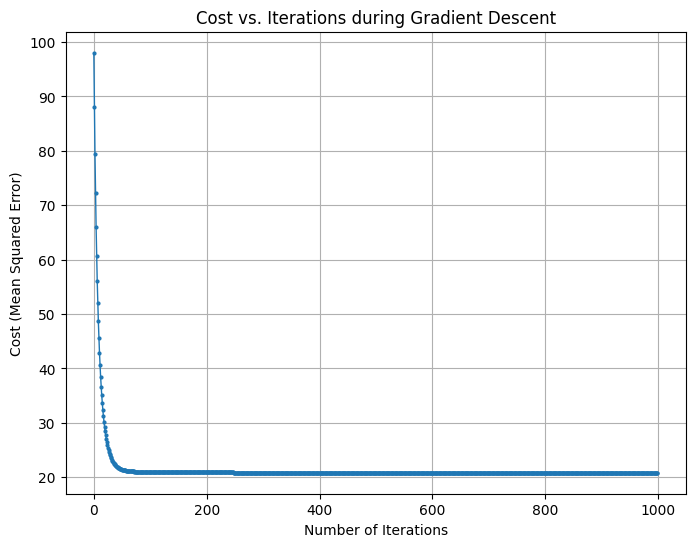

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, '-o', linewidth=1, markersize=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Cost vs. Iterations during Gradient Descent')
plt.grid(True)
plt.show()